# Spam Emails Attack Detection using Network Flow Data with Decision Tree Model

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
df2 = pd.read_csv("2-Neris-20110811.binetflow.csv")     # Spam Emails Attack

In [118]:
df2.shape

(1732769, 15)

In [119]:
df2.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/11 09:53:40.240135,9.016532,tcp,31.96.153.11,60257,->,147.32.84.229,443,SRA_SA,0.0,0.0,7,508,208,flow=Background-TCP-Established
1,2011/08/11 09:55:01.054702,2.903761,tcp,83.228.37.92,2571,->,147.32.84.229,13363,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established
2,2011/08/11 09:55:02.677188,3.032142,tcp,83.228.37.92,2574,->,147.32.84.229,443,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established
3,2011/08/11 09:55:04.307051,2.932428,tcp,83.228.37.92,2576,->,147.32.84.229,80,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established
4,2011/08/11 09:55:03.958463,6.017523,tcp,83.228.37.92,2571,->,147.32.84.229,13363,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established


### Data Preprocessing

In [120]:
df2 = df2.drop('Dir', axis =1)

In [121]:
df2.dropna(inplace=True)

In [122]:
nRow, nCol = df2.shape
print(f'This Dataset has {nRow} rows and {nCol} columns')

This Dataset has 1478546 rows and 14 columns


In [123]:
for i, col in enumerate(df2.columns):
    print(i, col)

0 StartTime
1 Dur
2 Proto
3 SrcAddr
4 Sport
5 DstAddr
6 Dport
7 State
8 sTos
9 dTos
10 TotPkts
11 TotBytes
12 SrcBytes
13 Label


In [124]:
df2.dtypes

StartTime     object
Dur          float64
Proto         object
SrcAddr       object
Sport         object
DstAddr       object
Dport         object
State         object
sTos         float64
dTos         float64
TotPkts        int64
TotBytes       int64
SrcBytes       int64
Label         object
dtype: object

In [125]:
df2['Label'].value_counts()

flow=To-Background-UDP-CVUT-DNS-Server                                     631082
flow=Background-UDP-Established                                            591407
flow=Background-TCP-Established                                            132281
flow=Background-Established-cmpgw-CVUT                                      72347
flow=To-Background-CVUT-Proxy                                               12420
                                                                            ...  
flow=From-Botnet-V43-TCP-Established-HTTP-Binary-Download-Custom-Port-7         1
flow=From-Botnet-V43-TCP-Established-HTTP-Ad-60                                 1
flow=From-Botnet-V43-TCP-Established-HTTP-Binary-Download-Custom-Port-5         1
flow=From-Botnet-V43-TCP-HTTP-Not-Encrypted-Down-2                              1
flow=To-Background-UDP-CV                                                       1
Name: Label, Length: 128, dtype: int64

In [126]:
# Create a new column and initialize with 'Benign'
df2['Attack_Label'] = 'Benign'


In [127]:
df2.loc[df2["Label"].str.contains("botnet", case=False), "Attack_Label"] = "Spam Emails Attack"

In [128]:
df2[df2['Label'].str.contains("botnet", case=False)]

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Attack_Label
52,2011/08/11 10:39:42.414864,130.427841,tcp,147.32.84.165,1372,193.23.181.44,80,FSRPA_FSPA,0.0,0.0,10,1020,574,flow=From-Botnet-V43-TCP-HTTP-Persistent-Down-1,Spam Emails Attack
53,2011/08/11 10:39:42.415145,130.727692,tcp,147.32.84.165,1378,72.20.15.61,80,FSPA_SRA,0.0,0.0,8,629,447,flow=From-Botnet-V43-TCP-HTTP-Persistent-Down-1,Spam Emails Attack
54,2011/08/11 10:39:42.415427,130.836685,tcp,147.32.84.165,1384,174.128.246.102,80,FSPA_SRA,0.0,0.0,8,629,507,flow=From-Botnet-V43-TCP-HTTP-Persistent-Down-1,Spam Emails Attack
55,2011/08/11 10:39:42.461329,135.338409,tcp,147.32.84.165,1403,193.23.181.44,179,FSPA_FSRA,0.0,0.0,10,756,456,flow=From-Botnet-V43-TCP-HTTP-Persistent-Down-1,Spam Emails Attack
56,2011/08/11 10:39:42.555397,138.770096,tcp,147.32.84.165,1424,193.23.181.44,179,FSPA_FSRA,0.0,0.0,10,756,456,flow=From-Botnet-V43-TCP-HTTP-Persistent-Down-1,Spam Emails Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731485,2011/08/11 13:45:54.311589,0.326480,tcp,147.32.84.165,4858,184.82.148.43,80,FSPA_FSPA,0.0,0.0,10,1923,983,flow=From-Botnet-V43-TCP-CC66-HTTP-Custom-Encr...,Spam Emails Attack
1731520,2011/08/11 13:45:54.511593,0.529376,tcp,147.32.84.165,4745,46.4.36.120,443,S_RA,0.0,0.0,4,244,124,flow=From-Botnet-V43-TCP-Attempt,Spam Emails Attack
1731569,2011/08/11 13:45:55.041317,0.321709,tcp,147.32.84.165,4771,184.82.148.44,80,FSPA_FSPA,0.0,0.0,10,1514,596,flow=From-Botnet-V43-TCP-Established-HTTP-Ad-31,Spam Emails Attack
1731772,2011/08/11 13:45:57.348529,0.186843,tcp,147.32.84.165,4901,217.163.21.37,80,FSPA_FSPA,0.0,0.0,13,6081,750,flow=From-Botnet-V43-TCP-Established-HTTP-Ad-45,Spam Emails Attack


In [129]:
# Drop the original 'Label' column and rename the new column to 'Label'
df2.drop('Label', axis=1, inplace=True)
df2.rename(columns={'Attack_Label': 'Label'}, inplace=True)

In [130]:
df2['Label'].value_counts()

Benign                1471098
Spam Emails Attack       7448
Name: Label, dtype: int64

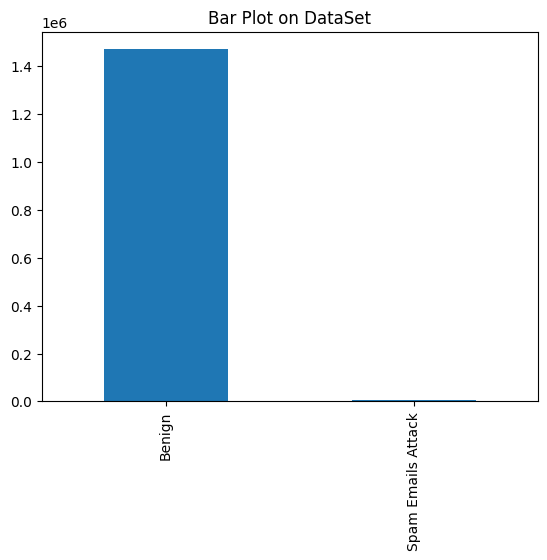

In [131]:
# statistical counts of genuine flow and spam emails flow
counts = df2['Label'].value_counts()
counts.plot(kind = 'bar')
plt.title('Bar Plot on DataSet')
plt.show()

In [132]:
df2.sample(n=20)

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
1657548,2011/08/11 13:31:39.234925,0.143099,udp,147.32.84.59,15675,24.166.211.84,40875,CON,0.0,0.0,2,134,74,Benign
1570575,2011/08/11 13:14:37.534367,0.006178,tcp,147.32.84.59,53762,147.32.3.92,4445,FSPA_FSPA,0.0,0.0,10,735,428,Benign
871040,2011/08/11 11:33:01.228516,0.000157,udp,147.32.86.168,44780,147.32.80.9,53,CON,0.0,0.0,2,230,90,Benign
959249,2011/08/11 11:44:16.220844,3090.679688,udp,89.190.200.114,53103,147.32.84.229,13363,CON,0.0,0.0,5,368,308,Benign
1215834,2011/08/11 12:15:09.073544,0.000269,udp,147.32.85.34,51777,147.32.80.9,53,CON,0.0,0.0,2,323,85,Benign
747347,2011/08/11 11:17:42.280955,0.000336,udp,147.32.84.138,46412,147.32.80.9,53,CON,0.0,0.0,2,214,81,Benign
280385,2011/08/11 10:17:36.714648,1820.661743,udp,76.23.144.197,10951,147.32.84.229,13363,CON,0.0,0.0,4,272,152,Benign
1448977,2011/08/11 12:51:57.747391,0.000259,udp,147.32.85.7,43894,147.32.80.9,53,CON,0.0,0.0,2,298,80,Benign
1555733,2011/08/11 13:12:01.139413,2.268682,tcp,147.32.84.59,49327,217.11.235.99,80,FSPA_FSPA,0.0,0.0,17,6328,1193,Benign
1133576,2011/08/11 12:03:39.669633,0.000306,udp,147.32.84.138,54607,147.32.80.9,53,CON,0.0,0.0,2,214,81,Benign


Feature Scaling

In [133]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = df2.select_dtypes(include=['float64','int64']).columns
sc_df = scaler.fit_transform(df2.select_dtypes(include=['float64','int64']))


# turn the result back to a dataframe
sc_df = pd.DataFrame(sc_df, columns = cols)

In [134]:
categorical_cols = df2.select_dtypes(include='O').keys()

In [135]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Loop through each categorical column and apply label encoding
for col in categorical_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))

### Dataset Splitting

In [136]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with a 70:30 ratio
train_X, test_X, train_Y, test_Y = train_test_split(df2.drop('Label', axis=1), df2['Label'], test_size=0.3)


In [137]:
train_X.shape

(1034982, 13)

In [138]:
train_X.head()

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes
95524,89048,0.000264,4,53898,58972,11717,25634,6,0.0,0.0,2,218,74
1412253,1278488,0.000263,4,53821,30889,11717,25634,6,0.0,0.0,2,252,85
827390,771692,0.000745,4,85131,45777,11798,2316,6,0.0,0.0,2,138,78
891551,831860,0.000143,4,53752,40148,11717,25634,6,0.0,0.0,2,214,81
852686,795585,0.000509,4,53898,52552,11717,25634,6,0.0,0.0,2,252,75


In [139]:
train_Y.head()

95524      0
1412253    0
827390     0
891551     0
852686     0
Name: Label, dtype: int64

In [140]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

func = RandomOverSampler(sampling_strategy = 'minority')

Otrain_X, Otrain_Y = func.fit_resample(train_X, train_Y)

Otest_X, Otest_Y = func.fit_resample(test_X, test_Y)

### Model Training and Prediction

In [149]:
from sklearn.neural_network import MLPClassifier
Neural_Net_model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu',
                                    solver='adam', alpha=0.01, batch_size=1000,
                                    learning_rate='adaptive', learning_rate_init=0.01,
                                    max_iter=2)
    
# Fitting the model is synonymous to training the model. Need to call .ravel() to get array in correct format.
Neural_Net_model.fit(Otrain_X, Otrain_Y)
    
# Using the model to predict the label/ classes, based upon X_test data only. This is the model's answers.
pred_y = Neural_Net_model.predict(Otest_X) 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn

Text(50.722222222222214, 0.5, 'Predicted labels')

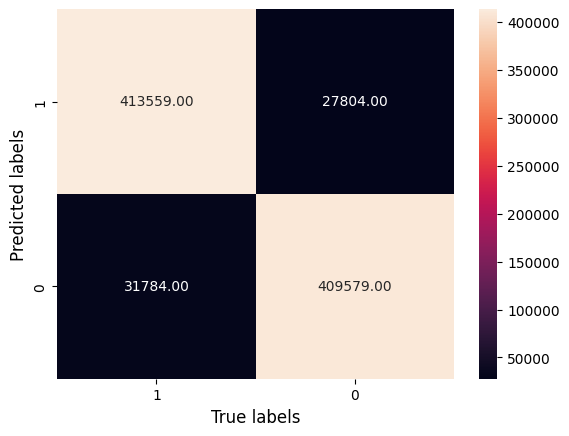

In [150]:
cm_dt = confusion_matrix(Otest_Y, pred_y)
sn.heatmap(cm_dt, annot=True,  fmt='.2f', xticklabels = [1, 0] , yticklabels = [1,0],cbar=True)
plt.xlabel('True labels',fontsize=12)
plt.ylabel('Predicted labels',fontsize=12)

In [151]:
print("Detection Accuracy: ", accuracy_score(Otest_Y, pred_y)*100,"%")

Detection Accuracy:  93.24954742468218 %


### Export Model

In [152]:
import pickle

pickle.dump(Neural_Net_model, open("NF-2-Spam-Emails-Attack-Neural_Network.pkl", "wb"))